## Model of the Sugar Factory Experiment

In [1]:
from model import Model
from dmchunk import Chunk
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'model'

First we define a function that determines the output of the factory

In [13]:
def factory_output(w, prod):
    new_production = 2 * w - prod + np.random.randint(-1,1)
    if new_production > 12:
        new_production = 12
    elif new_production < 1:
        new_production = 1
    return new_production

Target production is 9

In [14]:
target = 9

If the model fails to retrieve an experience, we need a backup default strategy. Here we just pick a random number of workers. Alternatively, we can try different default strategies

In [19]:
guess = 0

def default_strategy(production, target):
    global guess
    guess = (guess % 10) + 1
    return guess

In [16]:
def do_one_day(m, day, production):
    query = Chunk(name = "retrieval", slots = {"yesterday" : production, "today" : target})
    result, latency = m.retrieve_partial(query)
    if result == None:
        workers = default_strategy(production, target)
    else:
        workers = result.slots["workers"]
        m.add_encounter(result)
    m.time += latency
    new_production = factory_output(workers, production)
    new_chunk = Chunk(name = "experience" + str(day), slots = {"yesterday" : production, "workers" : workers, 
                                                               "today": new_production})
    m.add_encounter(new_chunk)
    m.time += 5.0
    return new_production

In [17]:
def run_subject():
    day = 1
    production = 5
    m = Model()
    m.rt = -1.5
    results = []
    for i in range(80):
        production = do_one_day(m, day, production)
        if production >= 8 and production <= 10:
            results.append(1)
        else:
            results.append(0)
        day += 1
    return results


def run_experiment(n):
    totals = []
    for i in range(n):
        results = run_subject()
        if totals == []:
            totals = results
        else:
            totals = [x + y for x,y in zip(totals, results)]
    totals = [x / n for x in totals]
    plt.plot(range(80),totals)
        

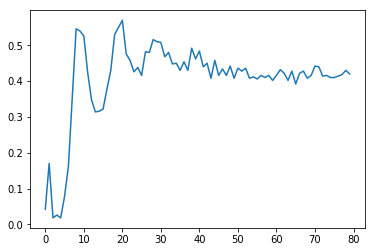

In [20]:
run_experiment(500)